<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Emiliano Mena González.

**Fecha:** 11 de marzo del 2023.

**Expediente** : 728407.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/EmilianoMena/ProyectoConjunto_EMena_DCastro.

# Tarea 4: Clase 9

># <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

### Ejercicio 1:
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Código de solución estudiante 1

Código de solución estudiante 2

In [2]:
# Función transformada inversa de F(x)
def Fx(N):
    y = np.sin((np.random.random(N)*np.pi)/2)**2
    return y

C:\Users\emili\AppData\Local\Temp\ipykernel_6380\3073218830.py:7: RuntimeWarning: divide by zero encountered in true_divide
  y2 = 1/(np.pi*np.sqrt(x*(1-x)))


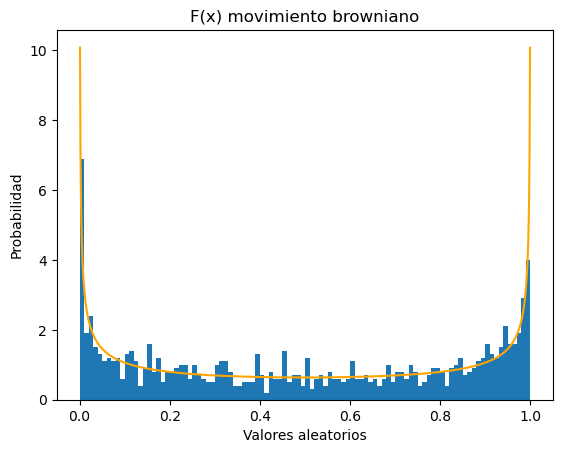

In [3]:
# Número de muestras
N = 1000
# Crear muestras de la función transformada inversa
y = Fx(N)
# Función de densidad
x = np.arange(0,1,0.001)
y2 = 1/(np.pi*np.sqrt(x*(1-x)))
plt.plot(x,y2,'orange')
# Histograma
plt.hist(y,bins=100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) movimiento browniano')
plt.show()

### Ejercicio 2:
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solución estudiante 1

Código de solución estudiante 2

In [4]:
# Función que calcula la probabilidad acumulada optimizada
def Fx_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [5]:
# Función acumulada discreta
def discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

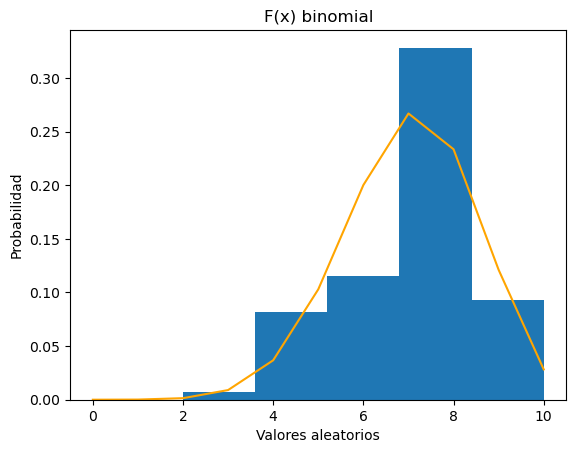

In [6]:
# Número de muestras
N = 1000
# Crear muestras de la función transformada inversa
n, p = 10, 0.7
p_acum = Fx_binomial(n,p)
d_binomial = discreta(p_acum, np.arange(0, n+1), N)
# Función de densidad
x=np.arange(n+1)
y=[np.math.comb(n,i)*p**i*(1-p)**(n-i) for i in x]
plt.plot(x,y,'orange')
# Histograma
plt.hist(d_binomial,bins=5,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) binomial')
plt.show()